In [24]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from datetime import datetime
from pathlib import Path
from matplotlib.patches import Rectangle

BASE_DIR = Path(os.path.abspath('')).parent.parent
os.chdir(BASE_DIR)
print(f'Working directory: {os.getcwd()}')

from utils import *

Working directory: c:\Users\jespe\Documents


# Compare performance between modalities

In [25]:
colors = ['slategray', 'forestgreen', 'darkgreen', 'gold', 'darkgoldenrod', 'red', 'darkred']
drop_metrics = ['loss', 'accuracy']

## p = (0.5, 1 class)

In [26]:
exp_folder = '2024-05-21_modality'
unimodal_params = '1class'
unimodal_models = ['No PT', 'Hard CPT', 'Easy RPT' ]
unimodal_results = [pd.read_pickle(f"results/pheno/{exp_folder}/FT_{model.replace(' ','')}_{unimodal_params}/CV_results.pkl") for model in unimodal_models]
unimodal_labels = ['U_NPT', 'U_HCPT', 'U_ERPT']
unimodal_labels = [f"{label}_{unimodal_params}" for label in unimodal_labels]

FileNotFoundError: [Errno 2] No such file or directory: 'results/pheno/2024-05-21_modality/FT_NoPT_1class/CV_results.pkl'

In [ ]:
multimodal_models = ['No PT', 'Medium CPT', 'Easy RPT']
multimodal_params = ['no_geno_1class', '1_1class', '0.75_1class', '0.5_1class', '0.25_1class', '0_1class']
multimodal_results = [pd.read_pickle(f"results/MM/{exp_folder}/FT_{model.replace(' ','')}_{params}/CV_results.pkl") for params in multimodal_params for model in multimodal_models]
multimodal_model_labels = ['MM_NPT', 'MM_MCPT', 'MM_ERPT']
multimodal_labels = [f'{model}_{params}' for params in multimodal_params for model in multimodal_model_labels]
print(multimodal_labels)

['MM_NPT_no_geno_1class', 'MM_MCPT_no_geno_1class', 'MM_ERPT_no_geno_1class', 'MM_NPT_1_1class', 'MM_MCPT_1_1class', 'MM_ERPT_1_1class', 'MM_NPT_0.75_1class', 'MM_MCPT_0.75_1class', 'MM_ERPT_0.75_1class', 'MM_NPT_0.5_1class', 'MM_MCPT_0.5_1class', 'MM_ERPT_0.5_1class', 'MM_NPT_0.25_1class', 'MM_MCPT_0.25_1class', 'MM_ERPT_0.25_1class', 'MM_NPT_0_1class', 'MM_MCPT_0_1class', 'MM_ERPT_0_1class']


In [ ]:
results = unimodal_results + multimodal_results
labels = unimodal_labels + multimodal_labels
multimodal_params_extended = [[param]*len(multimodal_models) for param in multimodal_params]
multimodal_params_extended = [item for sublist in multimodal_params_extended for item in sublist]
params = [unimodal_params]*len(unimodal_models) + multimodal_params_extended
ab_dfs = [get_ab_stats_df(df, include_auc=False) for df in results]
df_ab = create_multimodel_ab_df(ab_dfs, labels)
df_ab

ab_class avg_num    std_num S_share_median R_share_median  \
model                                                                           
antibiotic                                                                      
AMK          Aminoglycosides   524.0   1.897367       0.986564       0.013436   
AMP              Penicillins   976.0   4.955805       0.538620       0.461380   
CAZ           Cephalosporins   507.0  11.685889       0.730000       0.270000   
CIP         Fluoroquinolones   964.0   5.455273       0.806584       0.193416   
CRO           Cephalosporins   904.0   9.947864       0.817686       0.182314   
CTX           Cephalosporins   109.0   3.322650       0.127273       0.872727   
ETP              Carbapenems   530.0   5.635601       0.965583       0.034417   
FEP           Cephalosporins   517.0   5.192302       0.810606       0.189394   
GEN          Aminoglycosides   963.0   7.536577       0.870526       0.129474   
IPM              Carbapenems   467.0  11.426285       0.978541       0.021459   
LVX         Fluoroquinolones   439.0   6.887670       0.696429       0.303571   
MEM              Carbapenems  1004.0   7.547185       0.989076       0.010924   
MFX         Fluoroquinolones     8.0   0.800000       0.333333       0.666667   
NAL         Fluoroquinolones   512.0   9.591663       0.937984       0.062016   
TOB          Aminoglycosides   427.0   6.887670       0.920375       0.079625   

           S_share_std R_share_std accuracy_avg                              \
model                              U_NPT_1class U_HCPT_1class U_ERPT_1class   
antibiotic                                                                    
AMK           0.003691    0.003691     0.977123      0.983592      0.982059   
AMP           0.009294    0.009294     0.742326      0.756430      0.756850   
CAZ           0.017805    0.017805     0.873103      0.870593      0.873823   
CIP           0.005954    0.005954     0.856280      0.860199      0.856019   
CRO           0.015274    0.015274     0.920887      0.927498      0.929690   
CTX           0.018912    0.018912     0.881092      0.905227      0.901613   
ETP           0.009230    0.009230     0.950894      0.961479      0.964927   
FEP           0.007633    0.007633     0.881849      0.878316      0.882906   
GEN           0.011806    0.011806     0.851080      0.860449      0.857357   
IPM           0.008366    0.008366     0.965297      0.971324      0.972197   
LVX           0.010730    0.010730     0.808630      0.811417      0.809128   
MEM           0.003840    0.003840     0.983258      0.983856      0.984454   
MFX           0.107963    0.107963     0.671429      0.696429      0.696429   
NAL           0.005337    0.005337     0.898126      0.901351      0.900522   
TOB           0.021552    0.021552     0.874058      0.881057      0.883188   

            ...              F1_std                                       \
model       ... MM_ERPT_0.75_1class MM_NPT_0.5_1class MM_MCPT_0.5_1class   
antibiotic  ...                                                            
AMK         ...            0.112135          0.120418           0.135081   
AMP         ...            0.009725          0.012863           0.011571   
CAZ         ...            0.032276          0.034133           0.034825   
CIP         ...            0.020329          0.013487           0.021166   
CRO         ...            0.019595          0.017502           0.016164   
CTX         ...            0.013975          0.008661           0.010768   
ETP         ...            0.090742          0.077147           0.058794   
FEP         ...            0.027222          0.028070           0.042184   
GEN         ...            0.038372          0.051279           0.032872   
IPM         ...            0.123066          0.071114           0.047824   
LVX         ...            0.016309          0.011187           0.004514   
MEM         ...            0.087914          0.063102           0.100479  

In [ ]:
df_CV_list = [get_average_and_std_df(df, include_auc=False) for df in results]
df_combined = create_combined_results_df(df_CV_list, labels)
df_combined

avg                              \
model            U_NPT_1class U_HCPT_1class U_ERPT_1class   
metric                                                      
loss                 0.131485      0.130474      0.131264   
accuracy             0.886222      0.891914      0.891976   
isolate accuracy     0.449968      0.474682      0.473702   
sensitivity          0.638830      0.619503      0.629217   
specificity          0.937546      0.948334      0.946315   
F1                   0.658282      0.663013      0.666565   

                                                               \
model            MM_NPT_no_geno_1class MM_MCPT_no_geno_1class   
metric                                                          
loss                          0.129364               0.127667   
accuracy                      0.884825               0.892137   
isolate accuracy              0.544377               0.571531   
sensitivity                   0.647801               0.635659   
specificity                   0.934014               0.945248   
F1                            0.658815               0.669261   

                                                                          \
model            MM_ERPT_no_geno_1class MM_NPT_1_1class MM_MCPT_1_1class   
metric                                                                     
loss                           0.128966        0.101142         0.098687   
accuracy                       0.890824        0.905603         0.909888   
isolate accuracy               0.561169        0.602200         0.606885   
sensitivity                    0.634970        0.818163         0.814184   
specificity                    0.943936        0.923827         0.929754   
F1                             0.666187        0.748433         0.756174   

                                                      ...                 std  \
model            MM_ERPT_1_1class MM_NPT_0.75_1class  ... MM_ERPT_0.75_1class   
metric                                                ...                       
loss                     0.099181           0.081654  ...            0.008452   
accuracy                 0.910225           0.930648  ...            0.003543   
isolate accuracy         0.609656           0.683108  ...            0.009532   
sensitivity              0.807609           0.832209  ...            0.015925   
specificity              0.931492           0.951104  ...            0.003284   
F1                       0.755517           0.804785  ...            0.008509   

                                                                          \
model            MM_NPT_0.5_1class MM_MCPT_0.5_1class MM_ERPT_0.5_1class   
metric                                                                     
loss                      0.009057           0.008356           0.009943   
accuracy                  0.005068           0.005216           0.003929   
isolate accuracy          0.015623           0.019760           0.012391   
sensitivity               0.008963           0.018957           0.009935   
specificity               0.004673           0.003280           0.004658   
F1                        0.012680           0.011972           0.007476   

                                                                             \
model            MM_NPT_0.25_1class MM_MCPT_0.25_1class MM_ERPT_0.25_1class   
metric                                                                        
loss                       0.009729            0.006921            0.007273   
accuracy                   0.002800            0.003438            0.003747   
isolate accuracy           0.010785            0.015200            0.021115   
sensitivity                0.018562            0.013981            0.005525   
specificity                0.006366            0.005232            0.003586   
F1                         0.005552            0.007729            0.008379   

                                                                    
model    

In [ ]:
def plot_metric_by_params(
    df_combined,
    params,
    metric,
    labels,
    param_labels,
    legend: bool = True,
    savepath: str = None,
    figsize: tuple = (12, 6),
    ylim: tuple = (0.5, 1),
):
    metric_avg, metric_std = df_combined.loc[metric, 'avg'], df_combined.loc[metric, 'std']
    df_metric = pd.DataFrame({metric: metric_avg, 'std': metric_std}, index=labels)
    df_metric['params'] = params
    df_metric['model'] = ['No PT', 'CPT', 'RPT']*(len(df_metric)//3)
    
    palette = sns.color_palette("tab10", len(unimodal_models))
    deep_palette = sns.color_palette("dark", len(unimodal_models)+3)

    fig, ax = plt.subplots(figsize=figsize)
    bars = sns.barplot(data=df_metric, x='params', y=metric, hue='model', palette=deep_palette, ax=ax)

    x_coords = [p.get_x() + p.get_width() / 2 for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x_coords, y_coords, yerr=df_metric['std'], fmt='|', color='black', capsize=2)

    j = 0
    for i, patch in enumerate(ax.patches):
        if i % (len(params)/3) == 0:  # Change color for the first group of bars
            patch.set_facecolor(palette[j])
            j += 1

    ax.set_ylim(ylim)
    ax.set_xticklabels(param_labels, fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel(metric, fontsize=12)

    nopt = Rectangle((0,0),1,1,fc=palette[0], edgecolor = 'none')
    cpt = Rectangle((0,0),1,1,fc=palette[1], edgecolor = 'none')
    rpt = Rectangle((0,0),1,1,fc=palette[2], edgecolor = 'none')
    if legend:
        ax.legend([nopt, cpt, rpt], ['None', 'Class','Random'], title='Pre-training', fontsize=12, title_fontsize=12)
    else:
        ax.legend([], [], frameon=False) # hide legend
    if savepath:
        plt.savefig(savepath, bbox_inches='tight', dpi=300)
    plt.show()

c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

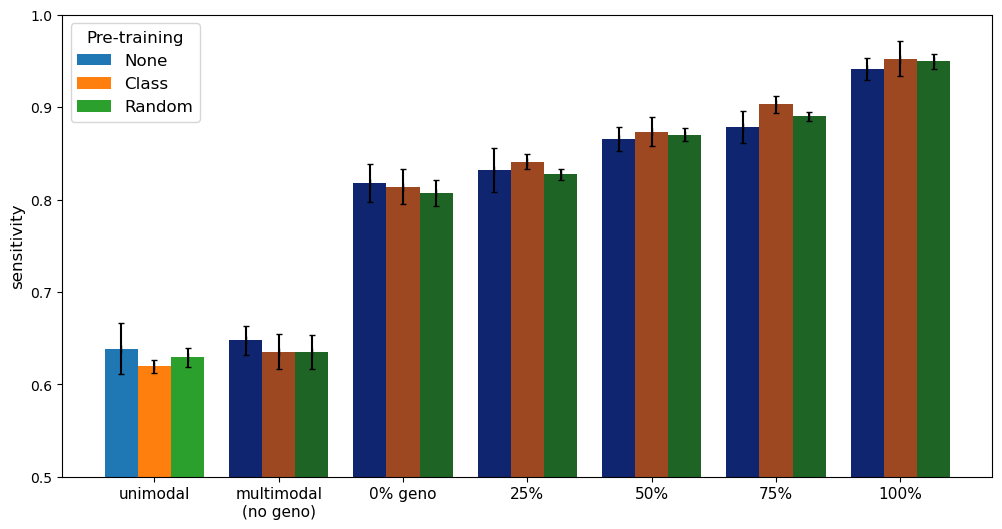

In [ ]:
param_labels = ['unimodal', 'multimodal\n(no geno)', '0% geno', '25%', '50%', '75%', '100%']
plot_metric_by_params(df_combined, params, 'sensitivity', labels, param_labels)

c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

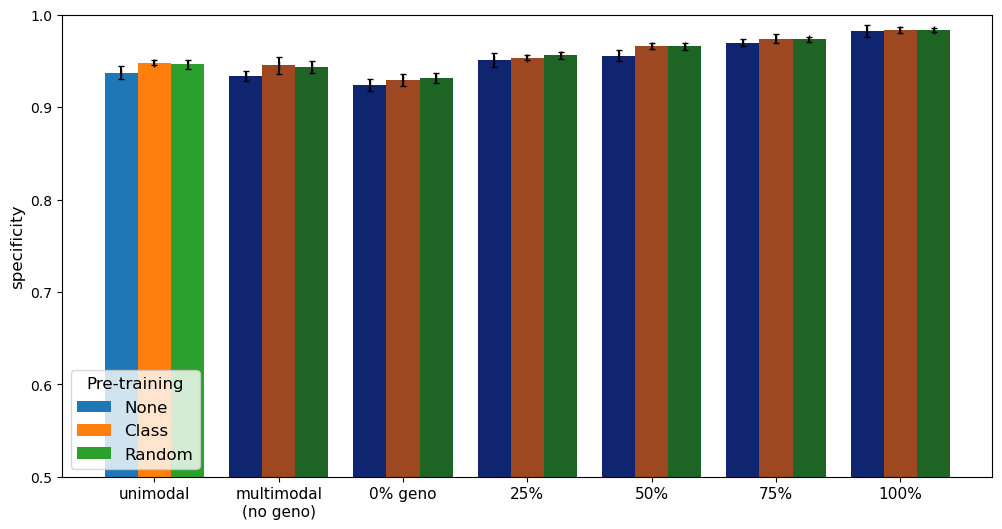

In [ ]:
plot_metric_by_params(df_combined, params, 'specificity', labels, param_labels)

c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

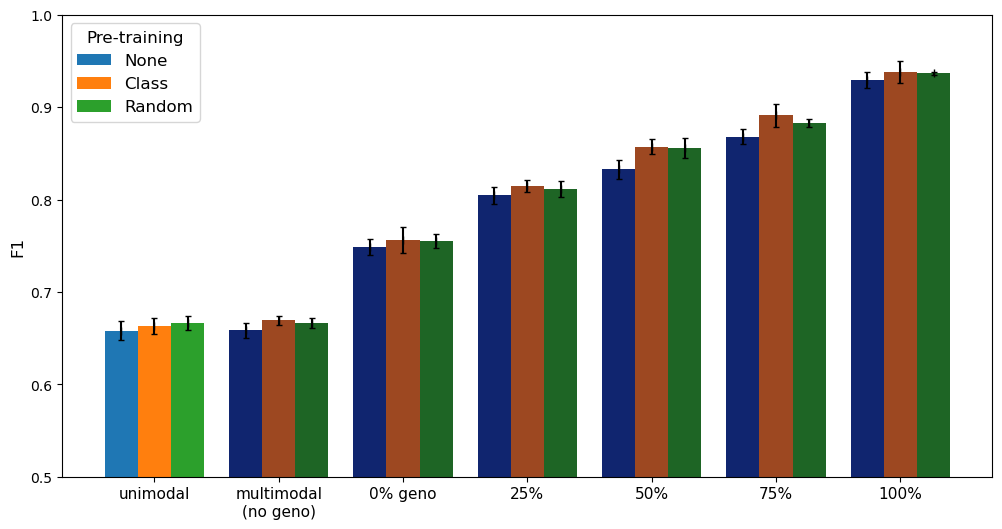

In [ ]:
plot_metric_by_params(df_combined, params, 'F1', labels, param_labels)

c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jespe\miniconda3\envs\ARFusion\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

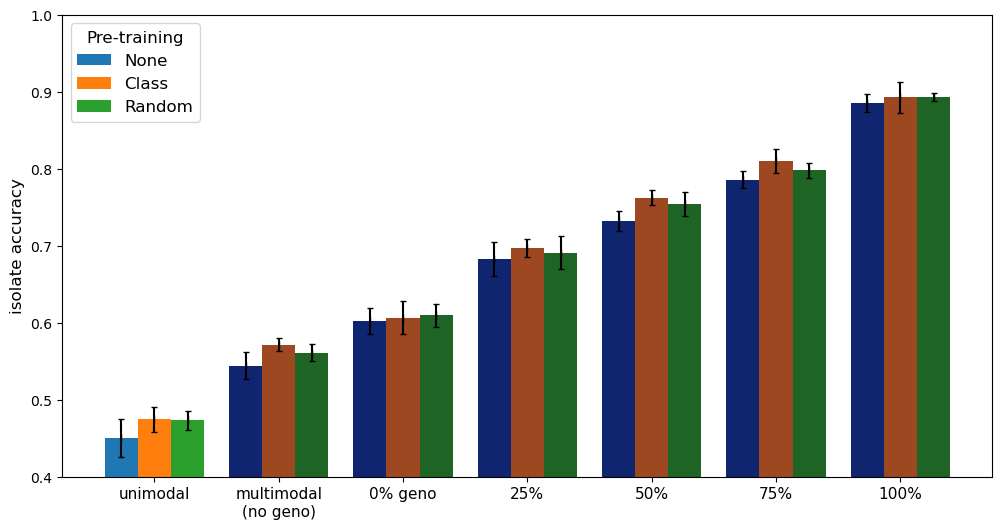

In [ ]:
plot_metric_by_params(df_combined, params, 'isolate accuracy', labels, param_labels, ylim=(0.4, 1))

## unimodal vs. multimodal (no genotypes) at the antibiotic level

['U_NPT_1class', 'U_HCPT_1class', 'U_ERPT_1class', 'MM_NPT_no_geno_1class', 'MM_MCPT_no_geno_1class', 'MM_ERPT_no_geno_1class']


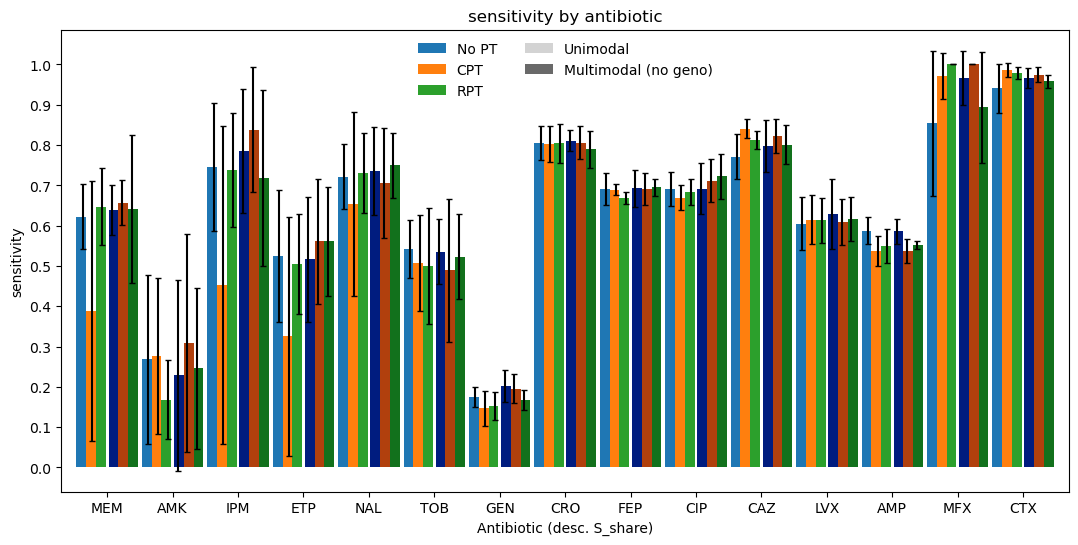

In [ ]:
plot_labels = labels[:6]
plot_ab_dfs = ab_dfs[:6]
print(plot_labels)
df_ab = create_multimodel_ab_df(plot_ab_dfs, plot_labels)
palette = sns.color_palette("tab10", len(unimodal_models))
deep_palette = sns.color_palette("dark", len(unimodal_models))

npt = Rectangle((0,0),1,1,fc=palette[0], edgecolor = 'none')
cpt = Rectangle((0,0),1,1,fc=palette[1], edgecolor = 'none')
rpt = Rectangle((0,0),1,1,fc=palette[2], edgecolor = 'none')
unimodal = Rectangle((0,0),1,1,fc='lightgrey', edgecolor = 'none')
multimodal = Rectangle((0,0),1,1,fc='dimgray', edgecolor = 'none')
legend_labels = ['No PT', 'CPT', 'RPT', 'Unimodal', 'Multimodal (no geno)']
legend_handles = [npt, cpt, rpt, unimodal, multimodal]

plot_metric_by_ab(df_ab, 'sensitivity', colors=palette+deep_palette, bar_width=0.9, legend_labels=legend_labels,
                  legend_handles=legend_handles, figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2)

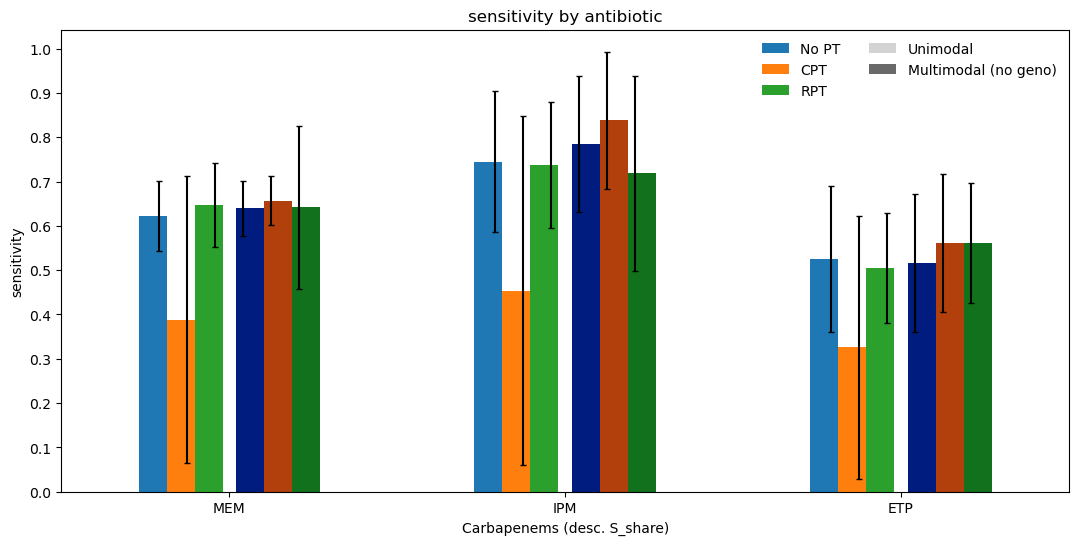

In [ ]:
plot_metric_by_ab(df_ab, 'sensitivity', colors=palette+deep_palette, bar_width=None, legend_labels=legend_labels, legend_handles=legend_handles,
                  figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2, select_ab_classes=['Carbapenems'])

## multimodal (geno removed vs 0% genotypes) at the antibiotic level

['MM_NPT_no_geno_1class', 'MM_MCPT_no_geno_1class', 'MM_ERPT_no_geno_1class', 'MM_NPT_1_1class', 'MM_MCPT_1_1class', 'MM_ERPT_1_1class']


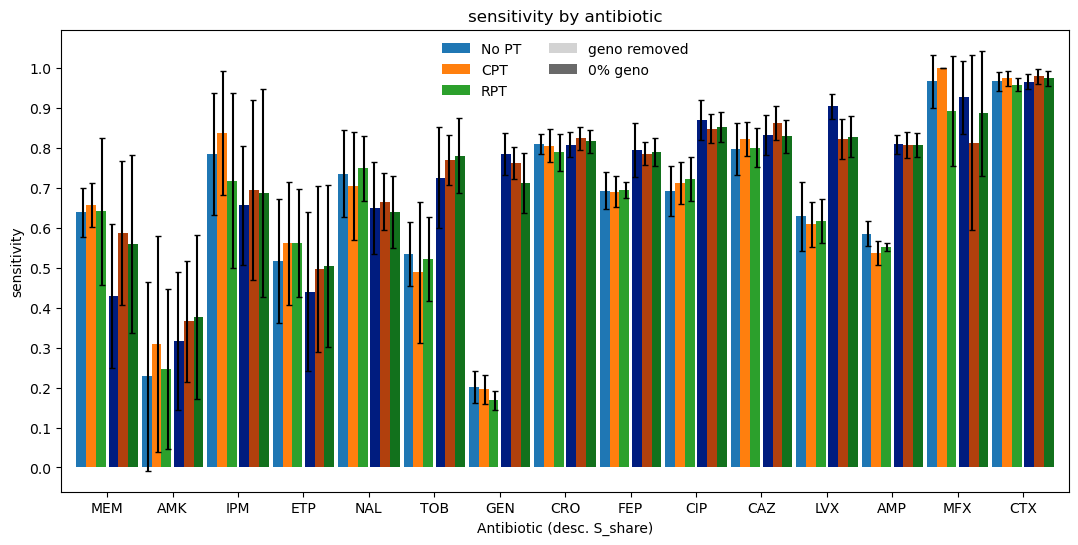

In [ ]:
plot_labels = labels[3:9]
plot_ab_dfs = ab_dfs[3:9]
print(plot_labels)
df_ab = create_multimodel_ab_df(plot_ab_dfs, plot_labels)
palette = sns.color_palette("tab10", len(unimodal_models))
deep_palette = sns.color_palette("dark", len(unimodal_models))

npt = Rectangle((0,0),1,1,fc=palette[0], edgecolor = 'none')
cpt = Rectangle((0,0),1,1,fc=palette[1], edgecolor = 'none')
rpt = Rectangle((0,0),1,1,fc=palette[2], edgecolor = 'none')
cat_1 = Rectangle((0,0),1,1,fc='lightgrey', edgecolor = 'none')
cat_2 = Rectangle((0,0),1,1,fc='dimgray', edgecolor = 'none')
legend_labels = ['No PT', 'CPT', 'RPT', 'geno removed', '0% geno']
legend_handles = [npt, cpt, rpt, cat_1, cat_2]

plot_metric_by_ab(df_ab, 'sensitivity', colors=palette+deep_palette, bar_width=0.9, legend_labels=legend_labels,
                  legend_handles=legend_handles, figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2)

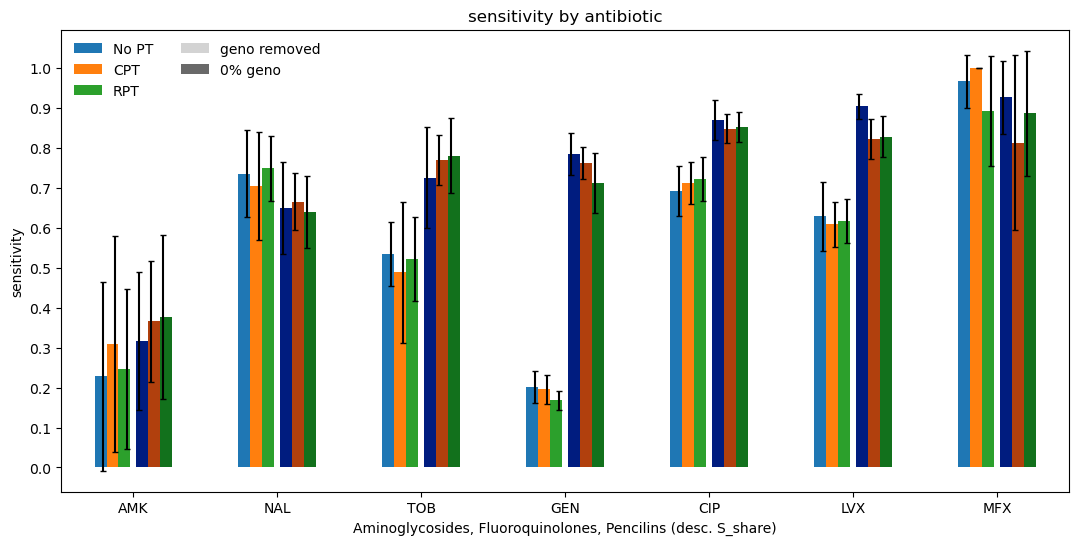

In [ ]:
plot_metric_by_ab(df_ab, 'sensitivity', colors=palette+deep_palette, bar_width=None, legend_labels=legend_labels, legend_handles=legend_handles,
                  figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2, 
                  select_ab_classes=['Aminoglycosides', 'Fluoroquinolones', 'Pencilins'])

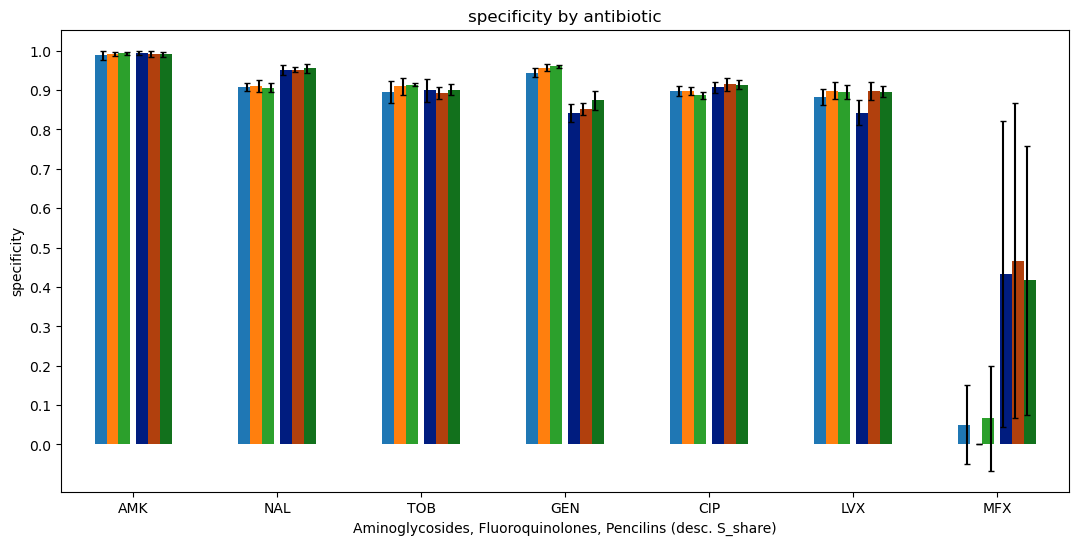

In [ ]:
plot_metric_by_ab(df_ab, 'specificity', colors=palette+deep_palette, bar_width=None, use_legend=False,
                  figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2, 
                  select_ab_classes=['Aminoglycosides', 'Fluoroquinolones', 'Pencilins'])

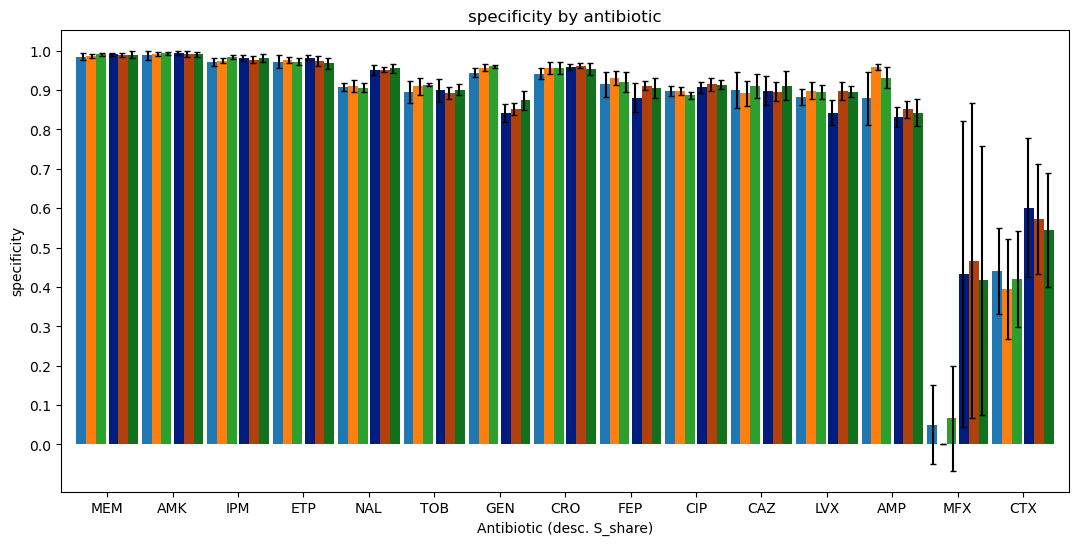

In [ ]:
plot_metric_by_ab(df_ab, 'specificity', colors=palette+deep_palette, bar_width=0.9, use_legend=False,
                  figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2)

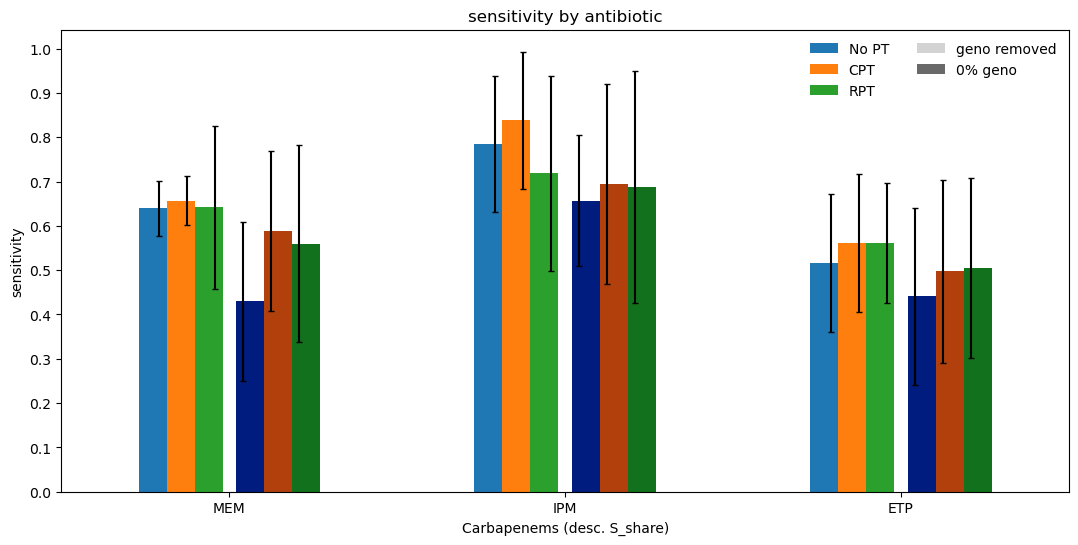

In [ ]:
plot_metric_by_ab(df_ab, 'sensitivity', colors=palette+deep_palette, bar_width=None, legend_labels=legend_labels, legend_handles=legend_handles,
                  figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2, 
                  select_ab_classes=['Carbapenems'])

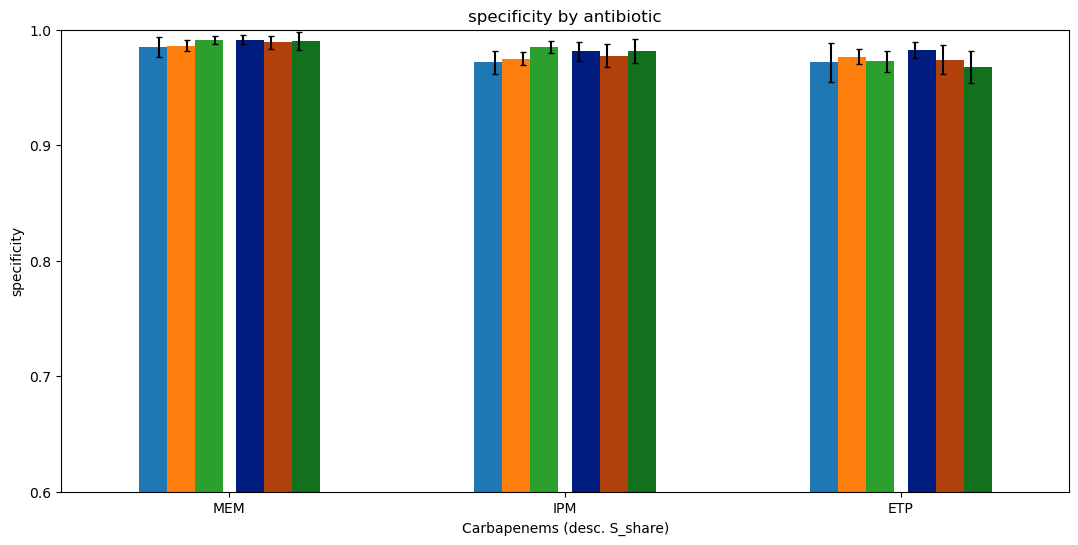

In [ ]:
plot_metric_by_ab(df_ab, 'specificity', colors=palette+deep_palette, bar_width=None, use_legend=False,
                  figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2, 
                  select_ab_classes=['Carbapenems'], ylim=(0.6, 1))

## multimodal (0% genotypes vs. 25% genotypes) at the antibiotic level

['MM_NPT_1_1class', 'MM_MCPT_1_1class', 'MM_ERPT_1_1class', 'MM_NPT_0.75_1class', 'MM_MCPT_0.75_1class', 'MM_ERPT_0.75_1class']


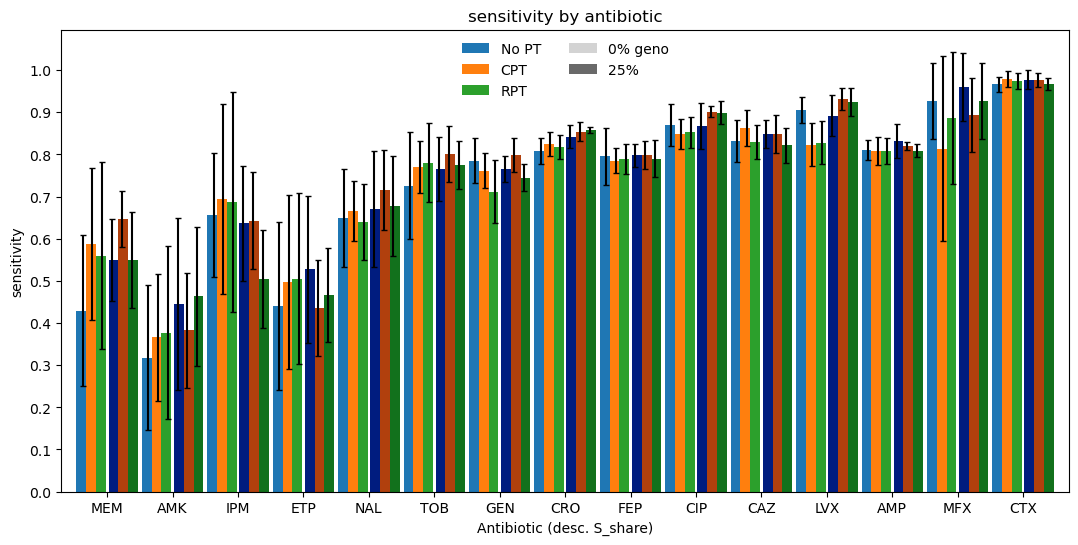

In [ ]:
plot_labels = labels[6:12]
plot_ab_dfs = ab_dfs[6:12]
print(plot_labels)
df_ab = create_multimodel_ab_df(plot_ab_dfs, plot_labels)
palette = sns.color_palette("tab10", len(unimodal_models))
deep_palette = sns.color_palette("dark", len(unimodal_models))

npt = Rectangle((0,0),1,1,fc=palette[0], edgecolor = 'none')
cpt = Rectangle((0,0),1,1,fc=palette[1], edgecolor = 'none')
rpt = Rectangle((0,0),1,1,fc=palette[2], edgecolor = 'none')
cat_1 = Rectangle((0,0),1,1,fc='lightgrey', edgecolor = 'none')
cat_2 = Rectangle((0,0),1,1,fc='dimgray', edgecolor = 'none')
legend_labels = ['No PT', 'CPT', 'RPT', '0% geno', '25%']
legend_handles = [npt, cpt, rpt, cat_1, cat_2]

plot_metric_by_ab(df_ab, 'sensitivity', colors=palette+deep_palette, bar_width=0.9, legend_labels=legend_labels,
                  legend_handles=legend_handles, figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2)

## multimodal (0% geno vs 100% geno) at the antibiotic level

['MM_NPT_1_1class', 'MM_MCPT_1_1class', 'MM_ERPT_1_1class', 'MM_NPT_0_1class', 'MM_MCPT_0_1class', 'MM_ERPT_0_1class']


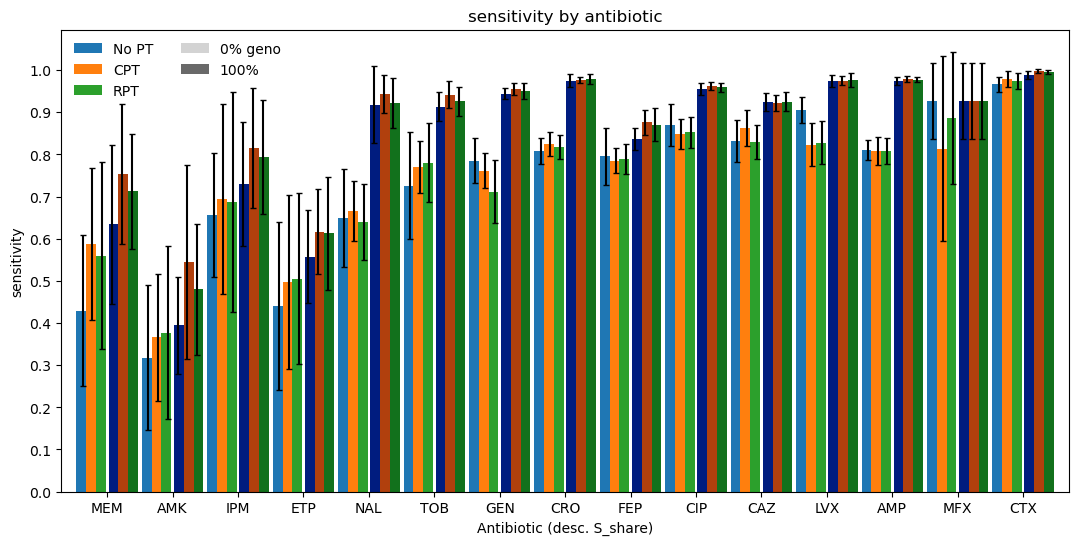

In [ ]:
plot_labels = labels[6:9] + labels[-3:]
plot_ab_dfs = ab_dfs[6:9] + ab_dfs[-3:]
print(plot_labels)
df_ab = create_multimodel_ab_df(plot_ab_dfs, plot_labels)
palette = sns.color_palette("tab10", len(unimodal_models))
deep_palette = sns.color_palette("dark", len(unimodal_models))

npt = Rectangle((0,0),1,1,fc=palette[0], edgecolor = 'none')
cpt = Rectangle((0,0),1,1,fc=palette[1], edgecolor = 'none')
rpt = Rectangle((0,0),1,1,fc=palette[2], edgecolor = 'none')
cat_1 = Rectangle((0,0),1,1,fc='lightgrey', edgecolor = 'none')
cat_2 = Rectangle((0,0),1,1,fc='dimgray', edgecolor = 'none')
legend_labels = ['No PT', 'CPT', 'RPT', '0% geno', '100%']
legend_handles = [npt, cpt, rpt, cat_1, cat_2]

plot_metric_by_ab(df_ab, 'sensitivity', colors=palette+deep_palette, bar_width=0.9, legend_labels=legend_labels,
                  legend_handles=legend_handles, figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2)

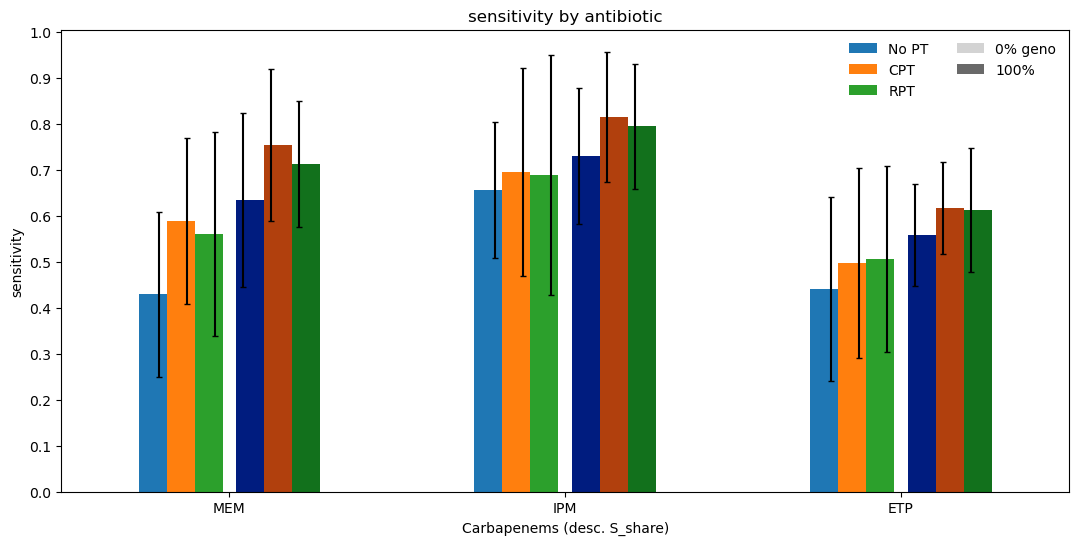

In [ ]:
plot_metric_by_ab(df_ab, 'sensitivity', colors=palette+deep_palette, bar_width=None, legend_labels=legend_labels, legend_handles=legend_handles,
                  figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2, select_ab_classes=['Carbapenems'])

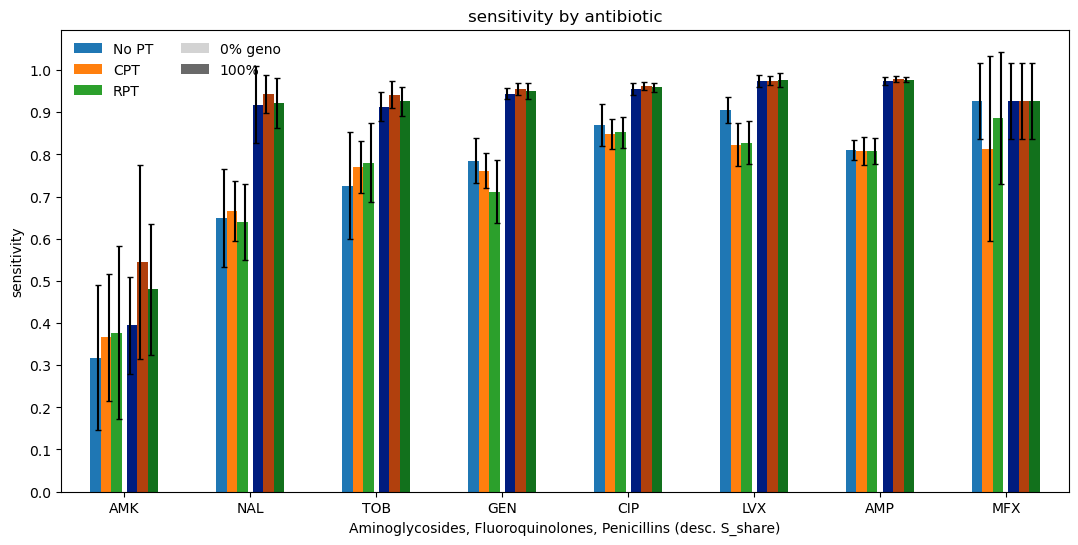

In [ ]:
plot_metric_by_ab(df_ab, 'sensitivity', colors=palette+deep_palette, bar_width=None, legend_labels=legend_labels, legend_handles=legend_handles,
                  figsize=(13, 6), n_legend_cols=2, use_spacing=True, group_spacing=0.02, num_groups=2, 
                  select_ab_classes=['Aminoglycosides', 'Fluoroquinolones', 'Penicillins'])